In [6]:
#Q1 done Load the dataset file:
!wget https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv


--2025-02-05 17:15:39--  https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.009s  

2025-02-05 17:15:39 (6.50 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [7]:
from google.colab import files


# Check the uploaded file(s)
import pandas as pd

# If 'titanic.csv' is uploaded, you can read it using pandas
df = pd.read_csv('titanic.csv')

# Display the first few rows of the dataframe
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Q2 Find out all the feature names where Null values exist.

# Check for columns with null values
null_columns = df.columns[df.isnull().any()].tolist()

# Display the columns that contain null values
print("Columns with null values:", null_columns)


Columns with null values: ['Age', 'Cabin', 'Embarked']


In [9]:
#Q3 Fill the null values of the 'Age' column with the mean of the other values

mean_age = df['Age'].mean()

# Fill the null values in the 'Age' column with the calculated mean
df['Age'] = df['Age'].fillna(mean_age)

# Verify if the null values have been filled
print(df['Age'].isnull().sum())  # Should return 0

# Fill the null values in the 'Cabin' column with 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')

# Verify if the null values have been filled
print(df['Cabin'].isnull().sum())  # Should return 0



0
0


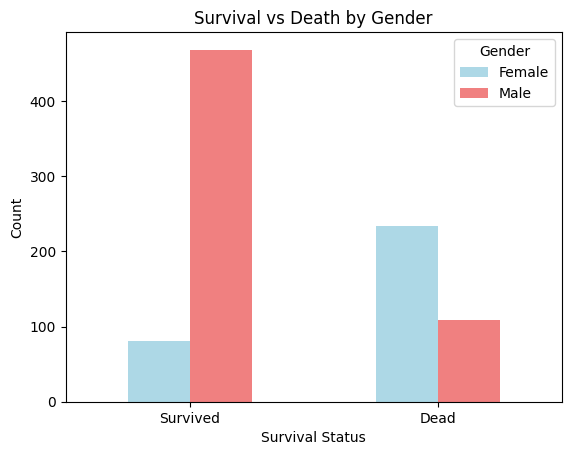

In [10]:
#Q4 Plot the dataset with 2 bars; Survived, Dead.
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by 'Survived' and 'Sex', then counting the occurrences
survival_counts = df.groupby(['Survived', 'Sex']).size().unstack(fill_value=0)

# Plotting the bar chart
survival_counts.plot(kind='bar', stacked=False, color=['lightblue', 'lightcoral'])

# Adding labels and title
plt.title('Survival vs Death by Gender')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Survived', 'Dead'], rotation=0)
plt.legend(title='Gender', labels=['Female', 'Male'])

# Display the plot
plt.show()


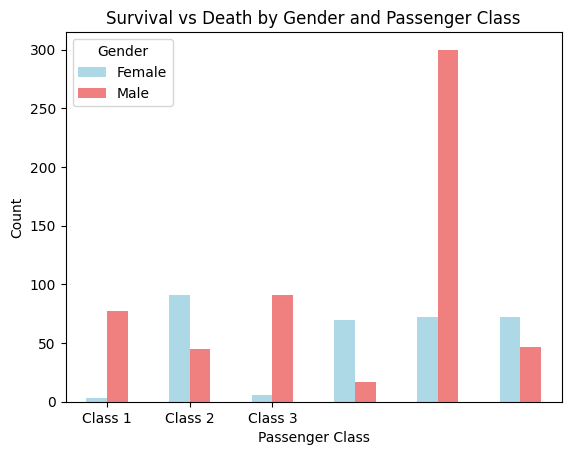

In [11]:
#Q5 Survived, and Dead bars amongst the 'Pclass'.
import matplotlib.pyplot as plt

# Grouping the data by 'Pclass', 'Survived', and 'Sex', then counting the occurrences
survival_by_pclass = df.groupby(['Pclass', 'Survived', 'Sex']).size().unstack(level=-1, fill_value=0)

# Plotting the bar chart
survival_by_pclass.plot(kind='bar', stacked=False, color=['lightblue', 'lightcoral'])

# Adding labels and title
plt.title('Survival vs Death by Gender and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Class 1', 'Class 2', 'Class 3'], rotation=0)
plt.legend(title='Gender', labels=['Female', 'Male'])

# Display the plot
plt.show()


In [12]:
#Q6  Create a column named 'AgeClass' and insert values
# Define a function to categorize Age into AgeClass
def assign_age_class(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

# Apply the function to the 'Age' column to create the 'AgeClass' column
df['AgeClass'] = df['Age'].apply(assign_age_class)

# Display the first few rows to check the new column
print(df[['Age', 'AgeClass']].head())


    Age  AgeClass
0  22.0         1
1  38.0         3
2  26.0         1
3  35.0         2
4  35.0         2


In [13]:
# Q7 Drop the 'Age' column
df.drop('Age', axis=1, inplace=True)

# Verify if the 'Age' column is dropped
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket     Fare    Cabin Embarked  AgeClass  
0         A/5 21171   7.2500  Unknown        S         1  
1          PC 17599  71.2833      C85        C         3  
2  STON/O2. 3101282   7.9250  Unknown        S         1  
3            113803  53.1000     C123        S         2  
4            373450

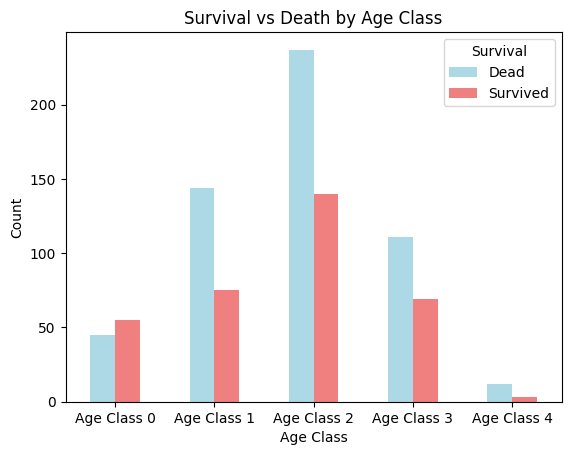

In [14]:
# Q8 plot of Survived and Dead using the value counts amongst 'AgeClass'
survival_by_age_class = df.groupby(['AgeClass', 'Survived']).size().unstack(fill_value=0)

# Plotting the bar chart
survival_by_age_class.plot(kind='bar', stacked=False, color=['lightblue', 'lightcoral'])

# Adding labels and title
plt.title('Survival vs Death by Age Class')
plt.xlabel('Age Class')
plt.ylabel('Count')
plt.xticks(range(len(survival_by_age_class.index)), ['Age Class 0', 'Age Class 1', 'Age Class 2', 'Age Class 3', 'Age Class 4'], rotation=0)
plt.legend(title='Survival', labels=['Dead', 'Survived'])

# Display the plot
plt.show()
